### Potato GDDClass

In [1]:
import pandas as pd

# Assuming this function needs to be defined:
def fahrenheit_to_celsius(temp_f):
    return (temp_f - 32) * 5/9

class PotatoGDD:
    def __init__(self, daily_temp_df, time_column, min_temp_column, max_temp_column, celsius=True):
        self.daily_temp_df = daily_temp_df
        self.time_column = time_column
        self.min_temp_column = min_temp_column
        self.max_temp_column = max_temp_column
        self.celsius = celsius

        # Ensure the time column is of datetime type
        self.daily_temp_df[self.time_column] = pd.to_datetime(self.daily_temp_df[self.time_column])

        # Convert the temperature to Celsius if required
        if not self.celsius:
            self.daily_temp_df[self.min_temp_column] = self.daily_temp_df[self.min_temp_column].apply(fahrenheit_to_celsius)
            self.daily_temp_df[self.max_temp_column] = self.daily_temp_df[self.max_temp_column].apply(fahrenheit_to_celsius)
    
    def potato_gdd(self, start_date, end_date):
        start_date = pd.Timestamp(start_date)
        end_date = pd.Timestamp(end_date)

        date_mask = (self.daily_temp_df[self.time_column] >= start_date) & (self.daily_temp_df[self.time_column] <= end_date)
        masked_data = self.daily_temp_df.loc[date_mask].copy()

        gdd_values = []
        cumulative_gdd = 0

        for index, row in masked_data.iterrows():
            min_temp = max(row[self.min_temp_column], 7 if self.celsius else 44.6)
            max_temp = min(row[self.max_temp_column], 30 if self.celsius else 86)

            mean_temp = (min_temp + max_temp) / 2
            base_temp = 7 if self.celsius else 44.6
            gdd = max(mean_temp - base_temp, 0)

            gdd_values.append(gdd)
            cumulative_gdd += gdd

        masked_data['GDD'] = gdd_values
        masked_data['Cumulative_GDD'] = masked_data['GDD'].cumsum()

        return masked_data


### all NOAA county data file

In [2]:
import pandas as pd

Wadena = pd.read_csv("Wadena_County_NOAA_nClimGrid.csv")
Cass = pd.read_csv("Cass_County_NOAA_nClimGrid.csv")
Crow_Wing = pd.read_csv("Crow_Wing_County_NOAA_nClimGrid.csv")
Todd = pd.read_csv("Todd_County_NOAA_nClimGrid.csv")
Morrison = pd.read_csv("Morrison_County_NOAA_nClimGrid.csv")
Douglas = pd.read_csv("Douglas_County_NOAA_nClimGrid.csv")
Otter_Tail = pd.read_csv("Otter_Tail_County_NOAA_nClimGrid.csv")
Pope = pd.read_csv("Pope_County_NOAA_nClimGrid.csv")
Stearns = pd.read_csv("Stearns_County_NOAA_nClimGrid.csv")
Sherburne = pd.read_csv("Sherburne_County_NOAA_nClimGrid.csv")
Benton = pd.read_csv("Benton_County_NOAA_nClimGrid.csv")
Becker = pd.read_csv("Becker_County_NOAA_nClimGrid.csv")
Hubbard= pd.read_csv("Hubbard_County_NOAA_nClimGrid.csv")
Kandiyohi= pd.read_csv("Kandiyohi_County_NOAA_nClimGrid.csv")



In [3]:
import pandas as pd

# List of CSV file paths and optional county names
files = {
    "Wadena": "Wadena_County_NOAA_nClimGrid.csv",
    "Cass": "Cass_County_NOAA_nClimGrid.csv",
    "Crow Wing": "Crow_Wing_County_NOAA_nClimGrid.csv",
    "Todd": "Todd_County_NOAA_nClimGrid.csv",
    "Morrison": "Morrison_County_NOAA_nClimGrid.csv",
    "Douglas": "Douglas_County_NOAA_nClimGrid.csv",
    "Otter Tail": "Otter_Tail_County_NOAA_nClimGrid.csv",
    "Pope": "Pope_County_NOAA_nClimGrid.csv",
    "Stearns": "Stearns_County_NOAA_nClimGrid.csv",
    "Sherburne": "Sherburne_County_NOAA_nClimGrid.csv",
    "Benton": "Benton_County_NOAA_nClimGrid.csv",
    "Becker": "Becker_County_NOAA_nClimGrid.csv",
    "Hubbard": "Hubbard_County_NOAA_nClimGrid.csv",
    "Kandiyohi": "Kandiyohi_County_NOAA_nClimGrid.csv"
}

# Read and concatenate all files into one DataFrame
all_data = []
for county, filepath in files.items():
    df = pd.read_csv(filepath)
    df["County"] = county  # Add a column to identify the county
    all_data.append(df)

combined_df = pd.concat(all_data, ignore_index=True)

# Save to CSV (optional)
combined_df.to_csv("Combined_NOAA_nClimGrid_AllCounties.csv", index=False)

# Display a sample
print(combined_df.head())


         time       tmax       tmin      prcp       tavg  Year  Month  County
0  1951-01-01  -0.159020 -18.729688  0.000000  -9.443679  1951      1  Wadena
1  1951-01-02 -10.320810 -24.195312  0.000000 -17.258381  1951      1  Wadena
2  1951-01-03 -11.314205 -21.031250  0.000000 -16.172372  1951      1  Wadena
3  1951-01-04  -9.409091 -19.158736  3.471946 -14.282884  1951      1  Wadena
4  1951-01-05 -14.235014 -26.321875  0.000000 -20.278551  1951      1  Wadena


### Caclculate GDD for all county

In [4]:
import pandas as pd

# Celsius to Fahrenheit converter
def c_to_f(temp_c):
    return (temp_c * 9/5) 

# Assume these DataFrames (Wadena, Cass, etc.) are already loaded
county_dfs = {
    "Wadena": Wadena,
    "Cass": Cass,
    "Crow_Wing": Crow_Wing,
    "Todd": Todd,
    "Morrison": Morrison,
    "Douglas": Douglas,
    "Otter_Tail": Otter_Tail,
    "Pope": Pope,
    "Stearns": Stearns,
    "Sherburne": Sherburne,
    "Benton": Benton,
    "Becker": Becker,
    "Hubbard": Hubbard,
    "Kandiyohi": Kandiyohi
}

# Process each county
for county_name, df in county_dfs.items():
    df['time'] = pd.to_datetime(df['time'])
    all_years = []

    for year in range(1951, 2025):
        potato = PotatoGDD(df, 'time', 'tmin', 'tmax', celsius=True)
        start = pd.to_datetime(f"{year}-01-01").date()
        end = pd.to_datetime(f"{year}-12-31").date()

        gdd_df = potato.potato_gdd(start, end)
        gdd_df['Year'] = year

        # Convert GDD to Fahrenheit-equivalent if needed
        gdd_df['GDD'] = gdd_df['GDD'].apply(c_to_f)
        gdd_df['Cumulative_GDD'] = gdd_df['Cumulative_GDD'].apply(c_to_f)

        all_years.append(gdd_df)

    historical_df = pd.concat(all_years, ignore_index=True)
    historical_df.to_csv(f"{county_name}_Potato_GDD_1951_2024.csv", index=False)
    print(f"Saved: {county_name}_Potato_GDD_1951_2024.csv")


Saved: Wadena_Potato_GDD_1951_2024.csv
Saved: Cass_Potato_GDD_1951_2024.csv
Saved: Crow_Wing_Potato_GDD_1951_2024.csv
Saved: Todd_Potato_GDD_1951_2024.csv
Saved: Morrison_Potato_GDD_1951_2024.csv
Saved: Douglas_Potato_GDD_1951_2024.csv
Saved: Otter_Tail_Potato_GDD_1951_2024.csv
Saved: Pope_Potato_GDD_1951_2024.csv
Saved: Stearns_Potato_GDD_1951_2024.csv
Saved: Sherburne_Potato_GDD_1951_2024.csv
Saved: Benton_Potato_GDD_1951_2024.csv
Saved: Becker_Potato_GDD_1951_2024.csv
Saved: Hubbard_Potato_GDD_1951_2024.csv
Saved: Kandiyohi_Potato_GDD_1951_2024.csv


### 2024 GDD compared to all county 2024 datasets

In [5]:
import pandas as pd

# Celsius to Fahrenheit converter
def c_to_f(temp_c):
    return (temp_c * 9/5) 

# Assume these DataFrames (Wadena, Cass, etc.) are already loaded
county_dfs = {
    "Wadena": Wadena,
    "Cass": Cass,
    "Crow_Wing": Crow_Wing,
    "Todd": Todd,
    "Morrison": Morrison,
    "Douglas": Douglas,
    "Otter_Tail": Otter_Tail,
    "Pope": Pope,
    "Stearns": Stearns,
    "Sherburne": Sherburne,
    "Benton": Benton,
    "Becker": Becker,
    "Hubbard": Hubbard,
    "Kandiyohi": Kandiyohi
}

# Process each county
for county_name, df in county_dfs.items():
    df['time'] = pd.to_datetime(df['time'])
    all_years = []

    for year in range(1951, 2025):
        potato = PotatoGDD(df, 'time', 'tmin', 'tmax', celsius=True)
        start = pd.to_datetime(f"{year}-04-16").date()
        end = pd.to_datetime(f"{year}-12-31").date()

        gdd_df = potato.potato_gdd(start, end)
        gdd_df['Year'] = year

        # Convert GDD to Fahrenheit-equivalent if needed
        gdd_df['GDD'] = gdd_df['GDD'].apply(c_to_f)
        gdd_df['Cumulative_GDD'] = gdd_df['Cumulative_GDD'].apply(c_to_f)

        all_years.append(gdd_df)

    historical_df = pd.concat(all_years, ignore_index=True)
    historical_df.to_csv(f"{county_name}_growing2024_Potato_GDD_1951_2024.csv", index=False)
    print(f"Saved: {county_name}_growing2024_Potato_GDD_1951_2024.csv")

Saved: Wadena_growing2024_Potato_GDD_1951_2024.csv
Saved: Cass_growing2024_Potato_GDD_1951_2024.csv
Saved: Crow_Wing_growing2024_Potato_GDD_1951_2024.csv
Saved: Todd_growing2024_Potato_GDD_1951_2024.csv
Saved: Morrison_growing2024_Potato_GDD_1951_2024.csv
Saved: Douglas_growing2024_Potato_GDD_1951_2024.csv
Saved: Otter_Tail_growing2024_Potato_GDD_1951_2024.csv
Saved: Pope_growing2024_Potato_GDD_1951_2024.csv
Saved: Stearns_growing2024_Potato_GDD_1951_2024.csv
Saved: Sherburne_growing2024_Potato_GDD_1951_2024.csv
Saved: Benton_growing2024_Potato_GDD_1951_2024.csv
Saved: Becker_growing2024_Potato_GDD_1951_2024.csv
Saved: Hubbard_growing2024_Potato_GDD_1951_2024.csv
Saved: Kandiyohi_growing2024_Potato_GDD_1951_2024.csv


In [6]:
import pandas as pd
import os

# === Step 0: Setup ===
county_names = [
    "Wadena", "Cass", "Crow_Wing", "Todd", "Morrison", "Douglas",
    "Otter_Tail", "Pope", "Stearns", "Sherburne", "Benton",
    "Becker", "Hubbard", "Kandiyohi"
]
planting_date = pd.Timestamp("2024-04-15")

# === Step 1: Load and process Becker 2024 Potato data ===
becker_2024 = pd.read_csv("Becker 2024 Potato growth stage.csv")
becker_2024.columns = becker_2024.columns.str.strip()
becker_2024["Date"] = pd.to_datetime(becker_2024["Date"] + "-2024", format="%d-%b-%Y", errors="coerce")

ordered_stages = ["I", "II", "III", "IV", "V"]

# Compute mode growth stage per date
becker_mode = becker_2024.groupby("Date")["Growth Stage"].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
).reset_index()

# Merge with AGDD and compute DAP
becker_mode_with_agdd = pd.merge(becker_mode, becker_2024, on=["Date", "Growth Stage"], how="left")
becker_mode_with_agdd["Becker DAP"] = (becker_mode_with_agdd["Date"] - planting_date).dt.days
becker_thresholds = becker_mode_with_agdd.drop_duplicates("Growth Stage")[["Growth Stage", "AGDD", "Becker DAP"]]
becker_thresholds["Growth Stage"] = pd.Categorical(becker_thresholds["Growth Stage"], categories=ordered_stages, ordered=True)
becker_thresholds = becker_thresholds.sort_values("Growth Stage").dropna()

# === Step 2: Function to extract stage timing from other counties ===
def get_stage_table_with_becker_dap(df, thresholds_df, planting_date, county, crop_name="Potato"):
    df["time"] = pd.to_datetime(df["time"])
    df = df[df["Year"] == 2024].copy()
    df["DAP"] = (df["time"] - planting_date).dt.days

    results = []
    for _, row in thresholds_df.iterrows():
        stage = row["Growth Stage"]
        threshold = row["AGDD"]
        dap_becker = int(row["Becker DAP"])
        hit = df[df["Cumulative_GDD"] >= threshold]
        if not hit.empty:
            match = hit.iloc[0]
            results.append({
                "Crop": crop_name,
                "Stage": stage,
                "AGDD Threshold(°F)": round(threshold, 2),
                "DAP Threshold": dap_becker,
                f"{county} DAP": (match["time"] - planting_date).days,
                f"{county} AGDD(°F)": round(match["Cumulative_GDD"], 1)
            })
    return pd.DataFrame(results)

# Step 3: Loop through counties and compare with Becker 
for county in county_names:
    file_name = f"{county}_Potato_GDD_1951_2024.csv"
    if os.path.isfile(file_name):
        df = pd.read_csv(file_name, parse_dates=["time"])
        final_table = get_stage_table_with_becker_dap(df, becker_thresholds, planting_date, county)

        final_table["Stage"] = pd.Categorical(final_table["Stage"], categories=ordered_stages, ordered=True)
        final_table = final_table.sort_values("Stage").reset_index(drop=True)

        print(f"\n===== {county}_2024 =====")
        print(final_table.to_string(index=False))
    else:
        print(f"File not found: {file_name}")



===== Wadena_2024 =====
  Crop Stage  AGDD Threshold(°F)  DAP Threshold  Wadena DAP  Wadena AGDD(°F)
Potato     I              463.50             39          36            466.7
Potato    II              801.00             56          58            806.9
Potato   III             1297.44             77          82           1310.2
Potato    IV             1962.54            102         107           1981.0
Potato     V             2870.01            137         149           2885.9

===== Cass_2024 =====
  Crop Stage  AGDD Threshold(°F)  DAP Threshold  Cass DAP  Cass AGDD(°F)
Potato     I              463.50             39        39          467.6
Potato    II              801.00             56        60          809.0
Potato   III             1297.44             77        85         1319.1
Potato    IV             1962.54            102       110         1982.5
Potato     V             2870.01            137       153         2888.6

===== Crow_Wing_2024 =====
  Crop Stage  AGDD Thres

### Results for 2024 datasets

In [7]:
import pandas as pd
import os

#  Setup 
county_names = [
    "Wadena", "Cass", "Crow_Wing", "Todd", "Morrison", "Douglas",
    "Otter_Tail", "Pope", "Stearns", "Sherburne", "Benton",
    "Becker", "Hubbard", "Kandiyohi"
]
planting_date = pd.Timestamp("2024-04-15")

# Output folder
output_folder = "Potato_2024_Growth_Stages_Diff"
os.makedirs(output_folder, exist_ok=True)

# === Step 1: Load and process Becker 2024 Potato growth stages ===
becker_2024 = pd.read_csv("Becker 2024 Potato growth stage.csv")
becker_2024.columns = becker_2024.columns.str.strip()
becker_2024["Date"] = pd.to_datetime(becker_2024["Date"] + "-2024", format="%d-%b-%Y", errors="coerce")

ordered_stages = ["I", "II", "III", "IV", "V"]

# Mode-based thresholds
becker_mode = becker_2024.groupby("Date")["Growth Stage"].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
).reset_index()

becker_mode_with_agdd = pd.merge(becker_mode, becker_2024, on=["Date", "Growth Stage"], how="left")
becker_mode_with_agdd["Becker DAP"] = (becker_mode_with_agdd["Date"] - planting_date).dt.days
becker_thresholds = becker_mode_with_agdd.drop_duplicates("Growth Stage")[["Growth Stage", "AGDD", "Becker DAP"]]
becker_thresholds["Growth Stage"] = pd.Categorical(becker_thresholds["Growth Stage"], categories=ordered_stages, ordered=True)
becker_thresholds = becker_thresholds.sort_values("Growth Stage").dropna()

# === Step 2: Function to calculate stage difference table ===
def get_stage_table_with_becker_dap(df, thresholds_df, planting_date, county, crop_name="Potato"):
    df["time"] = pd.to_datetime(df["time"])
    df = df[df["Year"] == 2024].copy()
    df["DAP"] = (df["time"] - planting_date).dt.days

    results = []
    for _, row in thresholds_df.iterrows():
        stage = row["Growth Stage"]
        threshold = row["AGDD"]
        dap_becker = int(row["Becker DAP"])
        hit = df[df["Cumulative_GDD"] >= threshold]
        if not hit.empty:
            match = hit.iloc[0]
            county_dap = (match["time"] - planting_date).days
            county_agdd = round(match["Cumulative_GDD"], 1)
            results.append({
                "Crop": crop_name,
                "Stage": stage,
                "Becker DAP": dap_becker,
                f"{county} DAP": county_dap,
                "DAP Difference": county_dap - dap_becker,
                "Becker AGDD (°F)": round(threshold, 2),
                f"{county} AGDD (°F)": county_agdd,
                "AGDD Difference": county_agdd - round(threshold, 2)
            })
    return pd.DataFrame(results)

# === Step 3: Loop through counties and save tables ===
for county in county_names:
    file_name = f"{county}_Potato_GDD_1951_2024.csv"
    if os.path.isfile(file_name):
        df = pd.read_csv(file_name, parse_dates=["time"])
        final_table = get_stage_table_with_becker_dap(df, becker_thresholds, planting_date, county)

        final_table["Stage"] = pd.Categorical(final_table["Stage"], categories=ordered_stages, ordered=True)
        final_table = final_table.sort_values("Stage").reset_index(drop=True)

        output_path = os.path.join(output_folder, f"{county}_2024_growth_stage_diff.csv")
        final_table.to_csv(output_path, index=False)
        print(f"Saved: {output_path}")
    else:
        print(f" File not found: {file_name}")


Saved: Potato_2024_Growth_Stages_Diff/Wadena_2024_growth_stage_diff.csv
Saved: Potato_2024_Growth_Stages_Diff/Cass_2024_growth_stage_diff.csv
Saved: Potato_2024_Growth_Stages_Diff/Crow_Wing_2024_growth_stage_diff.csv
Saved: Potato_2024_Growth_Stages_Diff/Todd_2024_growth_stage_diff.csv
Saved: Potato_2024_Growth_Stages_Diff/Morrison_2024_growth_stage_diff.csv
Saved: Potato_2024_Growth_Stages_Diff/Douglas_2024_growth_stage_diff.csv
Saved: Potato_2024_Growth_Stages_Diff/Otter_Tail_2024_growth_stage_diff.csv
Saved: Potato_2024_Growth_Stages_Diff/Pope_2024_growth_stage_diff.csv
Saved: Potato_2024_Growth_Stages_Diff/Stearns_2024_growth_stage_diff.csv
Saved: Potato_2024_Growth_Stages_Diff/Sherburne_2024_growth_stage_diff.csv
Saved: Potato_2024_Growth_Stages_Diff/Benton_2024_growth_stage_diff.csv
Saved: Potato_2024_Growth_Stages_Diff/Becker_2024_growth_stage_diff.csv
Saved: Potato_2024_Growth_Stages_Diff/Hubbard_2024_growth_stage_diff.csv
Saved: Potato_2024_Growth_Stages_Diff/Kandiyohi_2024_gr

### Working on simulating each day april 15 to june 15 as planting days

In [8]:
import pandas as pd
from datetime import datetime, timedelta

# Function to convert Celsius GDD to Fahrenheit GDD
def celsius_to_fahrenheit(c):
    return c * 9 / 5

# Function to get list of planting dates
def generate_planting_dates(start_date, end_date):
    return [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

# Dictionary of your county dataframes (make sure they are defined properly)
county_dfs = {
    "Wadena": Wadena,
    "Cass": Cass,
    "Crow_Wing": Crow_Wing,
    "Todd": Todd,
    "Morrison": Morrison,
    "Douglas": Douglas,
    "Otter_Tail": Otter_Tail,
    "Pope": Pope,
    "Stearns": Stearns,
    "Sherburne": Sherburne,
    "Benton": Benton,
    "Becker": Becker,
    "Hubbard": Hubbard,
    "Kandiyohi": Kandiyohi
}

# Loop through each county and year
for county_name, df in county_dfs.items():
    df['time'] = pd.to_datetime(df['time'])

    all_planting_results = []
    for year in range(1951, 2025):
        potato = PotatoGDD(df, 'time', 'tmin', 'tmax')  # Your existing GDD class
        start_year = pd.to_datetime(f"{year}-04-15")
        end_year = pd.to_datetime(f"{year}-12-31")
        full_gdd_df = potato.potato_gdd(start_year.date(), end_year.date())
        full_gdd_df['time'] = pd.to_datetime(full_gdd_df['time'])
        full_gdd_df['GDD'] = celsius_to_fahrenheit(full_gdd_df['GDD'])

        planting_dates = generate_planting_dates(pd.to_datetime(f"{year}-04-15"), pd.to_datetime(f"{year}-06-15"))

        for planting_date in planting_dates:
            sub_df = full_gdd_df[full_gdd_df['time'] >= planting_date].copy()
            sub_df['Year'] = year
            sub_df['Planting Date'] = planting_date.date()
            sub_df['DAP'] = (sub_df['time'] - planting_date).dt.days
            sub_df['Cumulative_GDD'] = sub_df['GDD'].cumsum()
            all_planting_results.append(sub_df)

    historical_df = pd.concat(all_planting_results, ignore_index=True)
    output_name = f"{county_name}_AllPlantingDates_Potato_GDD_1951_2024.csv"
    historical_df.to_csv(output_name, index=False)
    print(f"Saved: {output_name}")


Saved: Wadena_AllPlantingDates_Potato_GDD_1951_2024.csv
Saved: Cass_AllPlantingDates_Potato_GDD_1951_2024.csv
Saved: Crow_Wing_AllPlantingDates_Potato_GDD_1951_2024.csv
Saved: Todd_AllPlantingDates_Potato_GDD_1951_2024.csv
Saved: Morrison_AllPlantingDates_Potato_GDD_1951_2024.csv
Saved: Douglas_AllPlantingDates_Potato_GDD_1951_2024.csv
Saved: Otter_Tail_AllPlantingDates_Potato_GDD_1951_2024.csv
Saved: Pope_AllPlantingDates_Potato_GDD_1951_2024.csv
Saved: Stearns_AllPlantingDates_Potato_GDD_1951_2024.csv
Saved: Sherburne_AllPlantingDates_Potato_GDD_1951_2024.csv
Saved: Benton_AllPlantingDates_Potato_GDD_1951_2024.csv
Saved: Becker_AllPlantingDates_Potato_GDD_1951_2024.csv
Saved: Hubbard_AllPlantingDates_Potato_GDD_1951_2024.csv
Saved: Kandiyohi_AllPlantingDates_Potato_GDD_1951_2024.csv


### Including Growth Stage threshold from Becker 2024 data

In [9]:
import pandas as pd
import os

# List of all counties
counties = [
    "Wadena", "Cass", "Crow_Wing", "Todd", "Morrison", "Douglas",
    "Otter_Tail", "Pope", "Stearns", "Sherburne", "Benton",
     "Hubbard", "Kandiyohi"
]

# Load Becker 2024 growth stages
becker = pd.read_csv("Becker 2024 Potato growth stage.csv")
becker.columns = becker.columns.str.strip()
becker["Date"] = pd.to_datetime(becker["Date"] + "-2024", format="%d-%b-%Y", errors="coerce")

# Extract mode AGDD threshold per stage
stages = ["I", "II", "III", "IV", "V"]
thresholds = (becker
              .groupby("Growth Stage")["AGDD"]
              .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
              .dropna()
              .loc[stages]
              .reset_index())
thresholds.columns = ["Stage", "AGDD Threshold"]

# Output folder
os.makedirs("AllCounties_PotatoGrowthStages_1951_2022", exist_ok=True)

# Process each county
for county in counties:
    input_file = f"{county}_AllPlantingDates_Potato_GDD_1951_2024.csv"
    if not os.path.exists(input_file):
        print(f"File not found: {input_file}")
        continue

    df = pd.read_csv(input_file)
    df["time"] = pd.to_datetime(df["time"])
    df["Planting Date"] = pd.to_datetime(df["Planting Date"])

    results = []
    for (year, planting), group in df.groupby(["Year", "Planting Date"]):
        group = group[group["time"] >= planting].copy()
        group = group.sort_values("time")
        group["Cumulative_GDD"] = group["GDD"].cumsum()

        for _, row in thresholds.iterrows():
            stage = row["Stage"]
            agdd_thresh = row["AGDD Threshold"]
            met = group[group["Cumulative_GDD"] >= agdd_thresh]

            if not met.empty:
                first_hit = met.iloc[0]
                dap = (first_hit["time"] - planting).days
                results.append({
                    "Crop": "Potato",
                    "County": county,
                    "Year": year,
                    "Planting Date": planting.date(),
                    "Stage": stage,
                    "AGDD Threshold (°F)": round(agdd_thresh, 2),
                    "DAP Reached": dap,
                    "AGDD Reached (°F)": round(first_hit["Cumulative_GDD"], 1)
                })
            else:
                results.append({
                    "Crop": "Potato",
                    "County": county,
                    "Year": year,
                    "Planting Date": planting.date(),
                    "Stage": stage,
                    "AGDD Threshold (°F)": round(agdd_thresh, 2),
                    "DAP Reached": "",
                    "AGDD Reached (°F)": ""
                })

    # Save per county
    out_df = pd.DataFrame(results)
    out_df.to_csv(f"AllCounties_PotatoGrowthStages_1951_2022/{county}_Potato_GrowthStages_1951_2022.csv", index=False)
    print(f"Saved: {county}_Potato_GrowthStages_1951_2022.csv")

Saved: Wadena_Potato_GrowthStages_1951_2022.csv
Saved: Cass_Potato_GrowthStages_1951_2022.csv
Saved: Crow_Wing_Potato_GrowthStages_1951_2022.csv
Saved: Todd_Potato_GrowthStages_1951_2022.csv
Saved: Morrison_Potato_GrowthStages_1951_2022.csv
Saved: Douglas_Potato_GrowthStages_1951_2022.csv
Saved: Otter_Tail_Potato_GrowthStages_1951_2022.csv
Saved: Pope_Potato_GrowthStages_1951_2022.csv
Saved: Stearns_Potato_GrowthStages_1951_2022.csv
Saved: Sherburne_Potato_GrowthStages_1951_2022.csv
Saved: Benton_Potato_GrowthStages_1951_2022.csv
Saved: Hubbard_Potato_GrowthStages_1951_2022.csv
Saved: Kandiyohi_Potato_GrowthStages_1951_2022.csv


### Final result with Delta days after planting

In [10]:
import pandas as pd
import os

#All county
counties = [
    "Wadena", "Cass", "Crow_Wing", "Todd", "Morrison", "Douglas",
    "Otter_Tail", "Pope", "Stearns", "Sherburne", "Benton",
    "Hubbard", "Kandiyohi"
]
output_folder = "AllCounties_PotatoGrowthStages_1951_2022_withBeckerRef"
os.makedirs(output_folder, exist_ok=True)

# === Step 1: Load Becker 2024 thresholds ===
becker = pd.read_csv("Becker 2024 Potato growth stage.csv")
becker.columns = becker.columns.str.strip()
becker["Date"] = pd.to_datetime(becker["Date"] + "-2024", format="%d-%b-%Y", errors="coerce")

# Set reference planting date
planting_date_2024 = pd.Timestamp("2024-04-15")

# Becker thresholds by stage
ordered_stages = ["I", "II", "III", "IV", "V"]
becker_stage_data = becker[["Growth Stage", "Date", "AGDD"]].dropna()
becker_stage_data["Becker DAP"] = (becker_stage_data["Date"] - planting_date_2024).dt.days
becker_thresholds = becker_stage_data.drop_duplicates("Growth Stage")[["Growth Stage", "AGDD", "Becker DAP"]]
becker_thresholds.columns = ["Stage", "Becker AGDD", "Becker DAP"]
becker_thresholds = becker_thresholds[becker_thresholds["Stage"].isin(ordered_stages)].reset_index(drop=True)

# === Step 2: Process Each County ===
for county in counties:
    input_file = f"{county}_AllPlantingDates_Potato_GDD_1951_2024.csv"
    if not os.path.exists(input_file):
        print(f"File not found: {input_file}")
        continue

    df = pd.read_csv(input_file)
    df["time"] = pd.to_datetime(df["time"])
    df["Planting Date"] = pd.to_datetime(df["Planting Date"])

    # Filter years
    df = df[df["Year"].between(1951, 2025)].copy()

    results = []
    for (year, planting), group in df.groupby(["Year", "Planting Date"]):
        group = group[group["time"] >= planting].copy()
        group = group.sort_values("time")
        group["Cumulative_GDD"] = group["GDD"].cumsum()

        for _, row in becker_thresholds.iterrows():
            stage = row["Stage"]
            becker_agdd = row["Becker AGDD"]
            becker_dap = row["Becker DAP"]

            met = group[group["Cumulative_GDD"] >= becker_agdd]
            if not met.empty:
                first_hit = met.iloc[0]
                dap_reached = (first_hit["time"] - planting).days
                agdd_reached = round(first_hit["Cumulative_GDD"], 1)

                results.append({
                    "Crop": "Potato",
                    "County": county,
                    "Year": year,
                    "Planting Date": planting.date(),
                    "Stage": stage,
                    "Becker DAP": becker_dap,
                    "DAP Reached": dap_reached,
                    "Δ DAP": dap_reached - becker_dap,
                    "Becker AGDD (°F)": round(becker_agdd, 2),
                    "AGDD Reached (°F)": agdd_reached,
                    "Delta AGDD (Compared to Becker)": round(agdd_reached - becker_agdd, 1)
                })
            else:
                results.append({
                    "Crop": "Potato",
                    "County": county,
                    "Year": year,
                    "Planting Date": planting.date(),
                    "Stage": stage,
                    "Becker DAP": becker_dap,
                    "DAP Reached": "",
                    "Δ DAP": "",
                    "Becker AGDD (°F)": round(becker_agdd, 2),
                    "AGDD Reached (°F)": "",
                    "Delta AGDD (Compared to Becker)": ""
                })

    # === Step 3: Save Result per County ===
    out_df = pd.DataFrame(results)
    out_path = f"{output_folder}/{county}_Potato_GrowthStages_1951_2022_with_BeckerReference.csv"
    out_df.to_csv(out_path, index=False)
    print(f"Saved: {out_path}")


Saved: AllCounties_PotatoGrowthStages_1951_2022_withBeckerRef/Wadena_Potato_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_PotatoGrowthStages_1951_2022_withBeckerRef/Cass_Potato_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_PotatoGrowthStages_1951_2022_withBeckerRef/Crow_Wing_Potato_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_PotatoGrowthStages_1951_2022_withBeckerRef/Todd_Potato_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_PotatoGrowthStages_1951_2022_withBeckerRef/Morrison_Potato_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_PotatoGrowthStages_1951_2022_withBeckerRef/Douglas_Potato_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_PotatoGrowthStages_1951_2022_withBeckerRef/Otter_Tail_Potato_GrowthStages_1951_2022_with_BeckerReference.csv
Saved: AllCounties_PotatoGrowthStages_1951_2022_withBeckerRef/Pope_Potato_GrowthStages_1951_2022_with_BeckerReference.csv
Save

In [11]:
import pandas as pd
import os

# Define folder and list of files
folder = "AllCounties_PotatoGrowthStages_1951_2022_withBeckerRef"
all_files = [f for f in os.listdir(folder) if f.endswith(".csv")]

# Combine all county CSVs
combined_df = pd.concat([pd.read_csv(os.path.join(folder, file)) for file in all_files], ignore_index=True)

# Save to one CSV
combined_df.to_csv("AllCounties_Potato_GrowthStages_Combined.csv", index=False)
print("Combined CSV saved as: AllCounties_Potato_GrowthStages_Combined.csv")


Combined CSV saved as: AllCounties_Potato_GrowthStages_Combined.csv


In [12]:
import pandas as pd

# Load growth stage data and NOAA daily weather
df = pd.read_csv("AllCounties_Potato_GrowthStages_Combined.csv")
# Preprocessing
df["Planting Date"] = pd.to_datetime(df["Planting Date"], errors="coerce")
df["Stage Date"] = df["Planting Date"] + pd.to_timedelta(df["DAP Reached"], unit="D")

# Filter for VT and R1 stages
df_filtered = df[df["Stage"].isin(["III", "IV"])]
dap_pivot = df_filtered.pivot_table(index=["Year", "County", "Planting Date"], columns="Stage", values="DAP Reached").reset_index()
dap_pivot = dap_pivot.dropna(subset=["III", "IV"])
dap_pivot["III_to_IV_Duration"] = dap_pivot["IV"] - dap_pivot["III"]

# Initialize an empty list to collect cleaned yearly data
cleaned = []

# Loop over each year, apply IQR filtering
for year, group in dap_pivot.groupby("Year"):
    q1 = group["III_to_IV_Duration"].quantile(0.25)
    q3 = group["III_to_IV_Duration"].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    # Filter rows within year-specific IQR range
    filtered = group[
        (group["III_to_IV_Duration"] >= lower) & 
        (group["III_to_IV_Duration"] <= upper)
    ]
    
    cleaned.append(filtered)

# Combine all into clean_dap
clean_dap = pd.concat(cleaned, ignore_index=True)


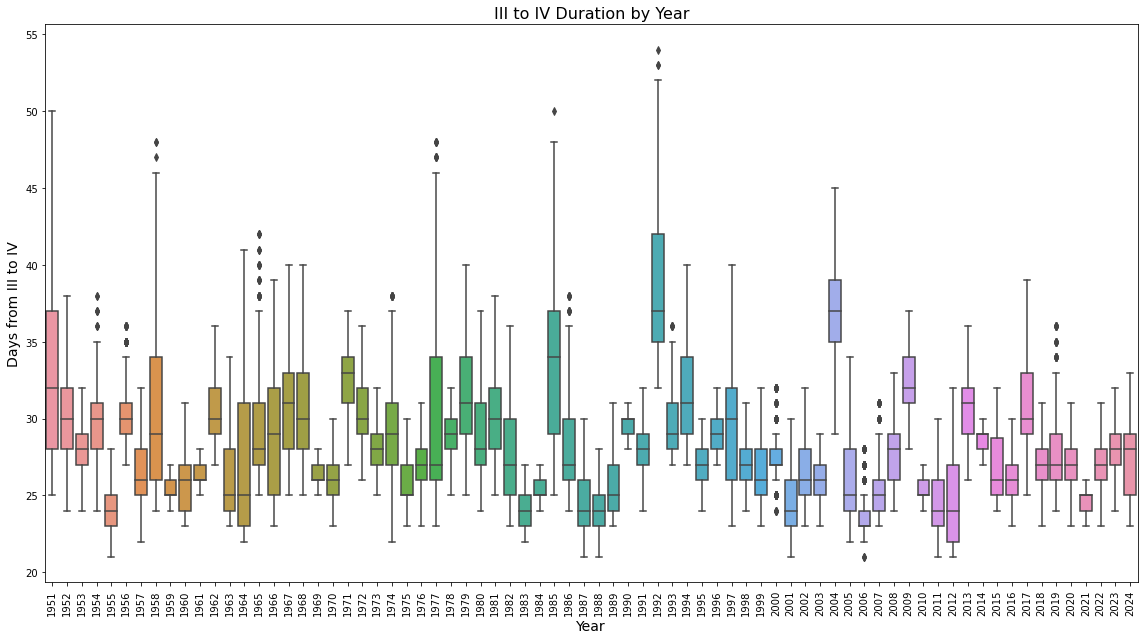

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot VT to R1 duration per year from clean_dap
plt.figure(figsize=(16, 9))
sns.boxplot(data=clean_dap, x="Year", y="III_to_IV_Duration")
plt.title("III to IV Duration by Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Days from III to IV", fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [23]:
noaa = pd.read_csv("Combined_NOAA_nClimGrid_AllCounties.csv")

In [24]:
import pandas as pd
noaa = pd.read_csv("Combined_NOAA_nClimGrid_AllCounties.csv")
# Ensure datetime format for NOAA time column
noaa["time"] = pd.to_datetime(noaa["time"], errors="coerce")

# Optional: speed up filtering by indexing
noaa = noaa.sort_values("time")  # Important for time-based filtering
noaa.set_index("time", inplace=True)  # Faster date slicing

# Store results
precip_data = []

# Group NOAA by County once to avoid repeatedly filtering whole dataframe
noaa_by_county = dict(tuple(noaa.groupby("County")))

# Loop through each record in clean_dap
for _, row in clean_dap.iterrows():
    county = row["County"]
    year = row["Year"]
    iii_date = row["Planting Date"] + pd.to_timedelta(row["III"], unit="D")
    iv_date = row["Planting Date"] + pd.to_timedelta(row["IV"], unit="D")

    # Get weather data for that county (faster lookup)
    if county not in noaa_by_county:
        continue  # skip if county not in NOAA data

    county_weather = noaa_by_county[county]

    # Slice by date range using datetime index
    date_filtered = county_weather.loc[iii_date:iv_date]

    total_precip = date_filtered["prcp"].sum()

    precip_data.append({
        "Year": year,
        "County": county,
        "Planting Date": row["Planting Date"],
        "III_Date": iii_date,
        "IV_Date": iv_date,
        "Precipitation (mm)": total_precip
    })

# Create final DataFrame
precip_df = pd.DataFrame(precip_data)


In [16]:
precip_df

,Year,County,Planting Date,III_Date,IV_Date,Precipitation (mm)
0,1951,Benton,1951-04-15,1951-07-10,1951-08-06,98.128986
1,1951,Benton,1951-04-16,1951-07-10,1951-08-06,98.128986
2,1951,Benton,1951-04-17,1951-07-10,1951-08-06,98.128986
3,1951,Benton,1951-04-18,1951-07-10,1951-08-06,98.128986
4,1951,Benton,1951-04-19,1951-07-10,1951-08-06,98.128986
...,...,...,...,...,...,...
48714,2024,Wadena,2024-06-11,2024-08-04,2024-09-03,64.832315
48715,2024,Wadena,2024-06-12,2024-08-04,2024-09-04,64.832315
48716,2024,Wadena,2024-06-13,2024-08-05,2024-09-05,61.626136
48717,2024,Wadena,2024-06-14,2024-08-07,2024-09-07,48.006747


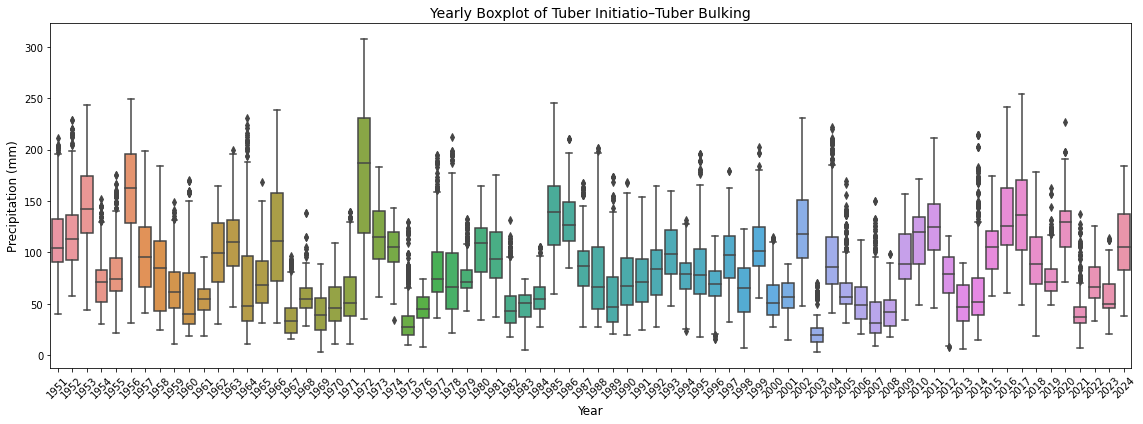

In [17]:
# Create the boxplot
plt.figure(figsize=(16, 6))
sns.boxplot(data=precip_df, x="Year", y="Precipitation (mm)")

# Customize the plot
plt.title("Yearly Boxplot of Tuber Initiatio–Tuber Bulking", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Precipitation (mm)", fontsize=12)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [25]:
# Define planting window (May 1 – May 10 of each year)
planting_start = pd.to_datetime("04-15", format="%m-%d")
planting_end   = pd.to_datetime("04-25", format="%m-%d")

precip_data = []

for _, row in clean_dap.iterrows():
    county = str(row["County"]).strip()
    year = row["Year"]
    planting_date = row["Planting Date"]

    # Skip if planting date is missing
    if pd.isna(planting_date):
        continue

    # Filter planting dates within May 1–May 10 window
    if not (planting_start.replace(year=year) <= planting_date <= planting_end.replace(year=year)):
        continue

    # Compute R3/R4 dates
    iii_date = planting_date + pd.to_timedelta(row["III"], unit="D")
    iv_date = planting_date + pd.to_timedelta(row["IV"], unit="D")

    if pd.isna(iii_date) or pd.isna(iv_date):
        continue

    start, end = (iii_date, iv_date) if iii_date <= iv_date else (iv_date, iii_date)

    county_weather = noaa_by_county.get(county)
    if county_weather is None:
        continue

    date_filtered = county_weather.loc[start:end]
    total_precip = date_filtered["prcp"].sum(skipna=True)

    precip_data.append({
        "Year": year,
        "County": county,
        "Planting Date": planting_date,
        "III_Date": iii_date,
        "IV_Date": iv_date,
        "Precipitation (mm)": total_precip
    })

precip_df_plantingwindow = pd.DataFrame(precip_data)


In [26]:
precip_df_plantingwindow

,Year,County,Planting Date,III_Date,IV_Date,Precipitation (mm)
0,1951,Benton,1951-04-15,1951-07-10,1951-08-06,98.128986
1,1951,Benton,1951-04-16,1951-07-10,1951-08-06,98.128986
2,1951,Benton,1951-04-17,1951-07-10,1951-08-06,98.128986
3,1951,Benton,1951-04-18,1951-07-10,1951-08-06,98.128986
4,1951,Benton,1951-04-19,1951-07-10,1951-08-06,98.128986
...,...,...,...,...,...,...
8890,2024,Wadena,2024-04-21,2024-07-12,2024-08-06,70.382884
8891,2024,Wadena,2024-04-22,2024-07-12,2024-08-06,70.382884
8892,2024,Wadena,2024-04-23,2024-07-12,2024-08-07,70.382884
8893,2024,Wadena,2024-04-24,2024-07-13,2024-08-07,70.382884


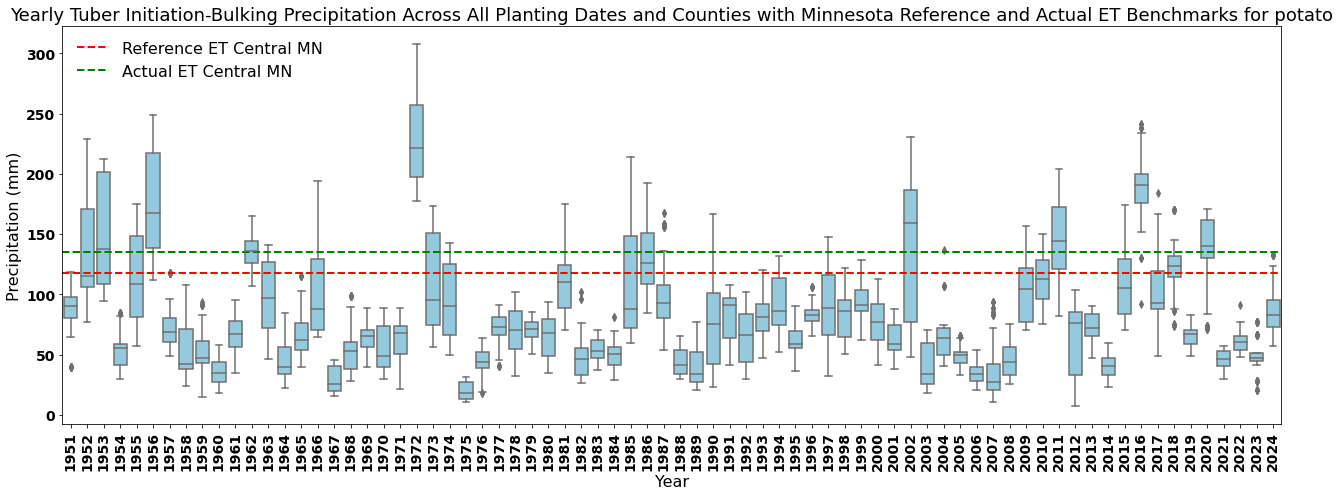

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reference ET (Central Minnesota benchmark, mm)
ref_et_Central_MN_mm = 117.58   # average ET
# Actual ET (scaled by 1.15 KC FAO)
actual_et_Central_MN_mm = 1.15 * ref_et_Central_MN_mm

# Create the boxplot
plt.figure(figsize=(18, 7))
sns.boxplot(data=precip_df_plantingwindow, x="Year", y="Precipitation (mm)", color="skyblue")

# Add benchmark line (reference ET)
plt.axhline(ref_et_Central_MN_mm, color='red', linestyle='--', linewidth=2, 
            label=f'Reference ET Central MN')

# Add actual ET line
plt.axhline(actual_et_Central_MN_mm, color='green', linestyle='--', linewidth=2, 
            label=f'Actual ET Central MN')

# Customize the plot
plt.title("Yearly Tuber Initiation-Bulking Precipitation Across All Planting Dates and Counties with Minnesota Reference and Actual ET Benchmarks for potato", fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Precipitation (mm)", fontsize=16)

# Tick labels
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

# Legend with larger font
plt.legend(loc="upper left", fontsize=16, frameon=False)

# Save at 300 dpi for publication
plt.tight_layout()
plt.savefig(
    "AllCounties_PotatoGrowthStages_1951_2022_withBeckerRef/III-IV_precip_boxplot_Minnesota.png",
    dpi=300, bbox_inches='tight'
)

plt.show()

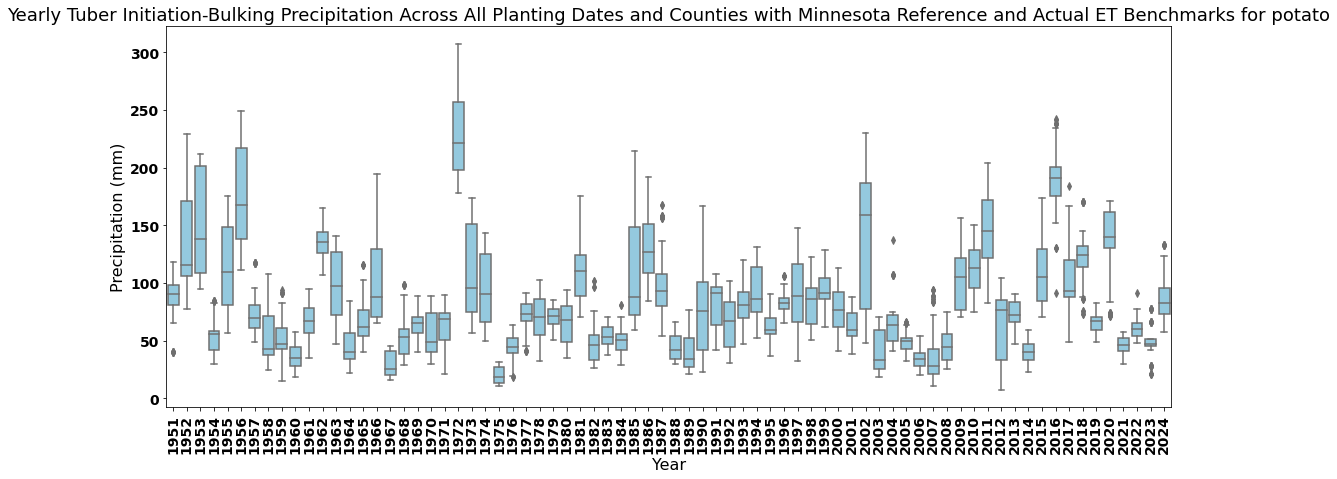

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot
plt.figure(figsize=(18, 7))
sns.boxplot(data=precip_df_plantingwindow, x="Year", y="Precipitation (mm)", color="skyblue")


# Customize the plot
plt.title("Yearly Tuber Initiation-Bulking Precipitation Across All Planting Dates and Counties with Minnesota Reference and Actual ET Benchmarks for potato", fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Precipitation (mm)", fontsize=16)

# Tick labels
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

plt.show()

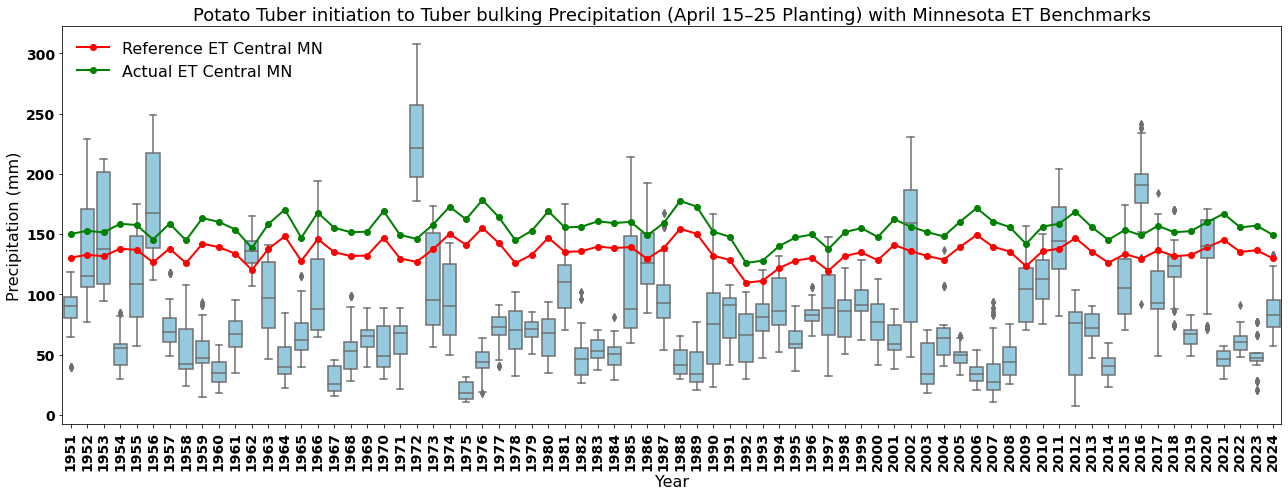

<Figure size 432x288 with 0 Axes>

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# --- Load ET data ---
et_df = pd.read_csv("HS ET data/Cumulative_ET_July1_26_1951_2024.csv")

# Ensure years are sorted consistently
years = sorted(precip_df_plantingwindow["Year"].unique())

# Create mapping Year → ET values
ref_map = dict(zip(et_df["Year"], et_df["RefET_Pot_III-IV"]))
act_map = dict(zip(et_df["Year"], et_df["ActET_Pot_III-IV"]))

# Build y series aligned to years
y_ref = [ref_map.get(y, np.nan) for y in years]
y_act = [act_map.get(y, np.nan) for y in years]

# x positions corresponding to categorical years
xpos = np.arange(len(years))

# --- Plot ---
plt.figure(figsize=(18, 7))

# Precipitation boxplot
sns.boxplot(
    data=precip_df_plantingwindow,
    x="Year",
    y="Precipitation (mm)",
    color="skyblue",
    order=years
)

# Overlay Reference ET (red line)
plt.plot(xpos, y_ref, color="red", marker="o", linewidth=2, label="Reference ET Central MN")

# Overlay Actual ET (green line)
plt.plot(xpos, y_act, color="green", marker="o", linewidth=2, label="Actual ET Central MN")

# Customize axes/titles
plt.title("Potato Tuber initiation to Tuber bulking Precipitation (April 15–25 Planting) with Minnesota ET Benchmarks", fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Precipitation (mm)", fontsize=16)

plt.xticks(ticks=xpos, labels=years, rotation=90, fontsize=14, fontweight="bold")
plt.yticks(fontsize=14, fontweight="bold")

plt.legend(loc="upper left", fontsize=16, frameon=False)
plt.tight_layout()
plt.savefig(
    "AllCounties_PotatoGrowthStages_1951_2022_withBeckerRef/HS_III-IV_precip_boxplot_Minnesota.png",
    dpi=300, bbox_inches='tight'
)
plt.show()
# Save at 300 dpi for publication
plt.tight_layout()

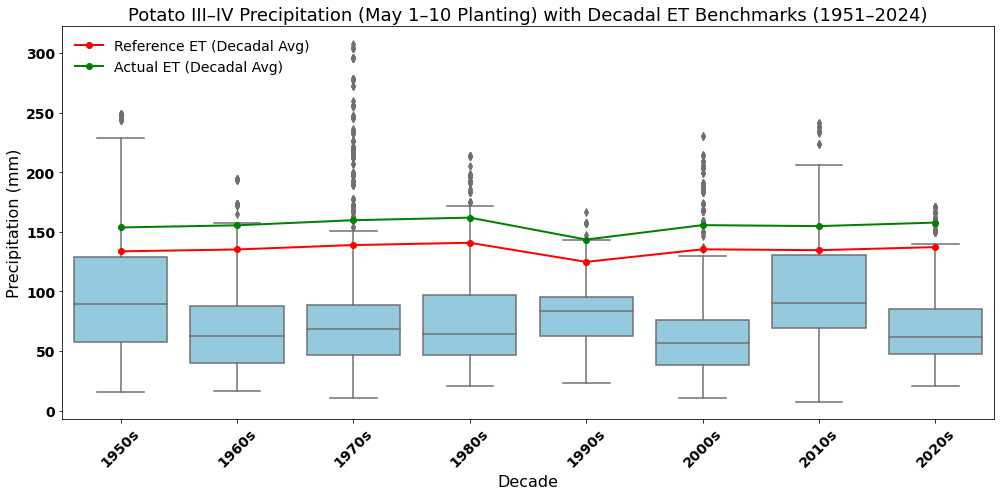

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# --- Load ET data ---
et_df = pd.read_csv("HS ET data/Cumulative_ET_July1_26_1951_2024.csv")

# --- Make Decade column ---
precip_df_plantingwindow["Decade"] = (precip_df_plantingwindow["Year"] // 10) * 10
et_df["Decade"] = (et_df["Year"] // 10) * 10

# --- Aggregate precipitation by decade ---
# Keep full distribution for boxplot
precip_decadal = precip_df_plantingwindow.copy()

# --- Aggregate ET by decade (mean) ---
et_decadal = et_df.groupby("Decade", as_index=False).agg({
    "RefET_Pot_III-IV": "mean",
    "ActET_Pot_III-IV": "mean"
})

# Sorted decade labels
decades = sorted(precip_decadal["Decade"].unique())
xpos = np.arange(len(decades))

# --- Plot ---
plt.figure(figsize=(14, 7))

# Precipitation boxplot (by decade)
sns.boxplot(
    data=precip_decadal,
    x="Decade",
    y="Precipitation (mm)",
    color="skyblue",
    order=decades
)

# Overlay Reference ET (red line)
plt.plot(
    xpos,
    et_decadal["RefET_Pot_III-IV"],
    color="red", marker="o", linewidth=2, label="Reference ET (Decadal Avg)"
)

# Overlay Actual ET (green line)
plt.plot(
    xpos,
    et_decadal["ActET_Pot_III-IV"],
    color="green", marker="o", linewidth=2, label="Actual ET (Decadal Avg)"
)

# Customize axes/titles
plt.title("Potato III–IV Precipitation (May 1–10 Planting) with Decadal ET Benchmarks (1951–2024)", fontsize=18)
plt.xlabel("Decade", fontsize=16)
plt.ylabel("Precipitation (mm)", fontsize=16)

plt.xticks(ticks=xpos, labels=[f"{d}s" for d in decades], rotation=45, fontsize=14, fontweight="bold")
plt.yticks(fontsize=14, fontweight="bold")

plt.legend(loc="upper left", fontsize=14, frameon=False)

# Save at 300 dpi for publication
plt.tight_layout()
plt.show()

In [33]:
import pandas as pd

# --- Add Decade column ---
et_df["Decade"] = (et_df["Year"] // 10) * 10
precip_df_plantingwindow["Decade"] = (precip_df_plantingwindow["Year"] // 10) * 10

# --- ET decadal stats (mean + median) ---
et_decadal = (
    et_df.groupby("Decade", as_index=False)
         .agg({
             "RefET_Pot_III-IV": ["mean", "median"],
             "ActET_Pot_III-IV": ["mean", "median"]
         })
)
et_decadal.columns = ["Decade", "RefET_mean", "RefET_median", "ActET_mean", "ActET_median"]

# --- Precip decadal stats (mean + median) ---
precip_decadal = (
    precip_df_plantingwindow.groupby("Decade", as_index=False)
         .agg({"Precipitation (mm)": ["mean", "median"]})
)
precip_decadal.columns = ["Decade", "Precip_mean", "Precip_median"]

# --- Merge ---
decadal_table = pd.merge(et_decadal, precip_decadal, on="Decade")

# --- Build DecadeRange ---
def make_range(d, last_year=2024):
    if d == 2020:   # special handling for last partial bin
        return f"2021-{last_year}"
    else:
        return f"{d+1}-{d+10}"

decadal_table["Year"] = decadal_table["Decade"].apply(make_range)

# --- Reorder columns for readability ---
decadal_table = decadal_table[[
    "Year", "RefET_mean", "RefET_median",
    "ActET_mean", "ActET_median",
    "Precip_mean", "Precip_median"
]]

# Round values
decadal_table = decadal_table.round(2)

# --- Display ---
print(decadal_table.to_string(index=False))

# --- Save ---
decadal_table.to_csv("Potato_III-IVDecadal_ET_Precip_Mean_Median.csv", index=False)


     Year  RefET_mean  RefET_median  ActET_mean  ActET_median  Precip_mean  Precip_median
1951-1960      133.65        132.89      153.70        152.82        98.95          89.15
1961-1970      135.23        134.42      155.51        154.59        69.17          62.38
1971-1980      138.95        139.30      159.79        160.19        83.51          68.64
1981-1990      140.82        138.89      161.95        159.73        75.84          64.68
1991-2000      124.82        128.32      143.55        147.56        80.60          83.32
2001-2010      135.35        135.73      155.65        156.09        65.74          56.76
2011-2020      134.63        134.47      154.83        154.64       102.31          90.52
2021-2024      137.21        136.59      157.79        157.08        75.69          61.60


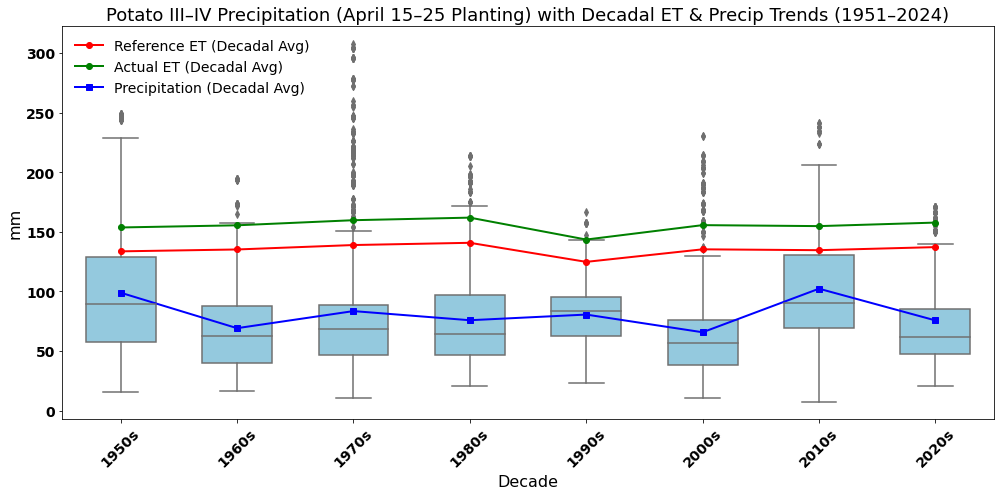

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# --- Load ET data ---
et_df = pd.read_csv("HS ET data/Cumulative_ET_July1_26_1951_2024.csv")

# --- Make Decade column ---
precip_df_plantingwindow["Decade"] = (precip_df_plantingwindow["Year"] // 10) * 10
et_df["Decade"] = (et_df["Year"] // 10) * 10

# --- Aggregate precipitation by decade (keep distribution for boxplot + compute means) ---
precip_decadal = precip_df_plantingwindow.copy()
precip_mean = (
    precip_decadal.groupby("Decade", as_index=False)["Precipitation (mm)"]
    .mean()
    .rename(columns={"Precipitation (mm)": "Precip_mean"})
)

# --- Aggregate ET by decade (mean) ---
et_decadal = et_df.groupby("Decade", as_index=False).agg({
    "RefET_Pot_III-IV": "mean",
    "ActET_Pot_III-IV": "mean"
})

# Sorted decade labels
decades = sorted(precip_decadal["Decade"].unique())
xpos = np.arange(len(decades))

# Reindex precip mean to match order
precip_mean = precip_mean.set_index("Decade").reindex(decades).reset_index()

# --- Plot ---
plt.figure(figsize=(14, 7))

# Precipitation boxplot (by decade)
sns.boxplot(
    data=precip_decadal,
    x="Decade",
    y="Precipitation (mm)",
    color="skyblue",
    order=decades,
    width=0.6
)

# Overlay Reference ET (red line)
plt.plot(
    xpos,
    et_decadal["RefET_Pot_III-IV"],
    color="red", marker="o", linewidth=2, label="Reference ET (Decadal Avg)"
)

# Overlay Actual ET (green line)
plt.plot(
    xpos,
    et_decadal["ActET_Pot_III-IV"],
    color="green", marker="o", linewidth=2, label="Actual ET (Decadal Avg)"
)

# Overlay Precipitation Mean (blue dashed line with square markers)
plt.plot(
    xpos,
    precip_mean["Precip_mean"],
    color="blue", marker="s", linewidth=2,
    label="Precipitation (Decadal Avg)"
)

# Customize axes/titles
plt.title("Potato III–IV Precipitation (April 15–25 Planting) with Decadal ET & Precip Trends (1951–2024)", fontsize=18)
plt.xlabel("Decade", fontsize=16)
plt.ylabel("mm", fontsize=16)

plt.xticks(ticks=xpos, labels=[f"{d}s" for d in decades], rotation=45, fontsize=14, fontweight="bold")
plt.yticks(fontsize=14, fontweight="bold")

plt.legend(loc="upper left", fontsize=14, frameon=False)

# Save at 300 dpi for publication
plt.tight_layout()
plt.show()
